### Variability Analysis.
L. Passos Reis.

In [1]:
## main imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## astro imports
import astropy.table
from astropy import units as u
from astropy.io import fits
from astropy.io import ascii
from astropy.table import QTable, Table

In [2]:
folder_path = '../4LAC_variability_analysis/resulting_catalogs/'
file_name = 'reliable_variability_agn_pop_4lac_dr3.fits'
file_path = folder_path + file_name

with fits.open(file_path) as hdul:
    data = hdul[1].data
    table = Table(data)
    
df = table.to_pandas()
df

,Source_Name,Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Norm_Excess_Var(3-days),err_Norm_Excess_Var(3-days)
0,J0001.2+4741,NaN,NaN,NaN,NaN
1,J0001.2-0747,-0.090948,0.002365,NaN,NaN
2,J0001.4-0010,NaN,NaN,NaN,NaN
3,J0001.5+2113,0.821839,0.031841,NaN,NaN
4,J0001.6-4156,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3809,J2359.3+0215,NaN,NaN,NaN,NaN
3810,J2359.3-2049,NaN,NaN,NaN,NaN
3811,J2359.7-5041,NaN,NaN,NaN,NaN
3812,J2359.9-3736,NaN,NaN,NaN,NaN


In [3]:
file_name = 'variability_complete_agn_pop_4lac_dr3.fits'
file_path = folder_path + file_name

with fits.open(file_path) as hdul:
    data = hdul[1].data
    table = Table(data)
    
df_compl = table.to_pandas()
df_compl

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,...,Fvar(3-days),err_Fvar(3-days),Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly),Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2+4741,0.312600,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J0001.2-0747,0.315100,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.090948,0.002365,0.000000,0.100000
2,J0001.4-0010,0.371700,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J0001.5+2113,0.381500,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,...,NaN,NaN,0.487329,0.024063,0.69809,0.017235,0.821839,0.031841,0.906554,0.017561
4,J0001.6-4156,0.416500,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,359.832886,2.260300,-inf,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,J2359.3-2049,359.835693,-20.818899,0.096000,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3811,J2359.7-5041,359.936493,-50.685299,-inf,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3812,J2359.9-3736,359.981598,-37.616001,-inf,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.equals(df_compl)

False

In [5]:
df_clean = df_compl.drop(columns=['RAJ2000','DEJ2000', 'Redshift'])
df_clean

,Source_Name,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,...,Fvar(3-days),err_Fvar(3-days),Norm_Excess_Var(weekly),err_Norm_Excess_Var(weekly),Fvar(weekly),err_Fvar(weekly),Norm_Excess_Var(monthly),err_Norm_Excess_Var(monthly),Fvar(monthly),err_Fvar(monthly)
0,J0001.2+4741,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,bcu,ISP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J0001.2-0747,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,bll,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.090948,0.002365,0.000000,0.100000
2,J0001.4-0010,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,0.132438,bll,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J0001.5+2113,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,0.159319,fsrq,ISP,...,NaN,NaN,0.487329,0.024063,0.69809,0.017235,0.821839,0.031841,0.906554,0.017561
4,J0001.6-4156,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,0.072754,bcu,HSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,LogParabola,5170.603516,5.111725e-15,1.757034,9.790216e-15,1.644894,0.460086,bcu,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,J2359.3-2049,PowerLaw,2594.249756,5.196033e-14,1.984188,5.197384e-14,1.982751,0.001760,bll,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3811,J2359.7-5041,LogParabola,842.054199,1.846089e-13,2.684101,3.137423e-13,2.596392,0.731089,bcu,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3812,J2359.9-3736,PowerLaw,1730.675415,6.743669e-14,2.120209,8.021262e-14,2.007299,0.127121,bcu,LSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_72147/3213901943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

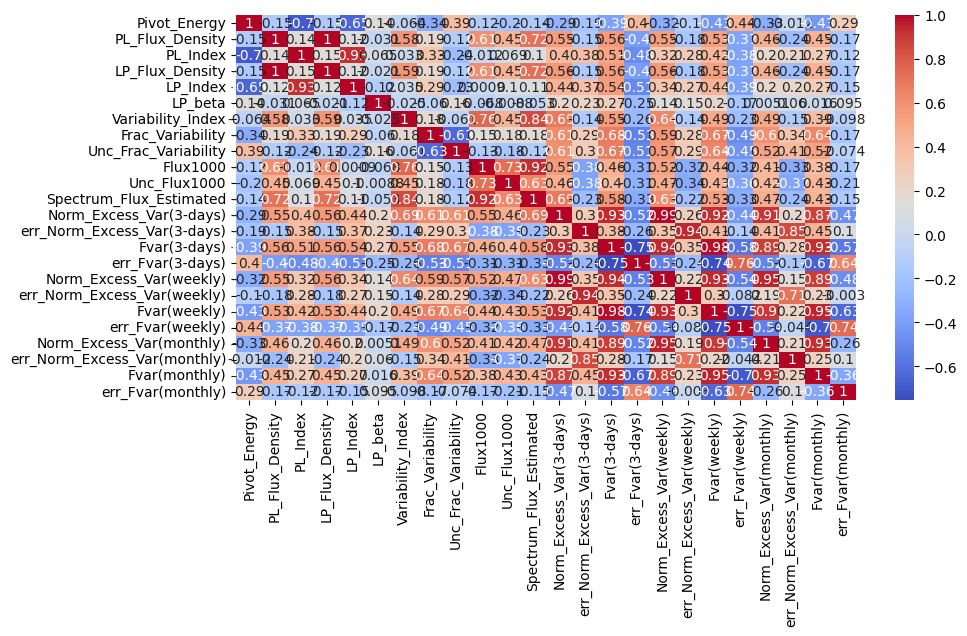

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')

# PL - LP Flux density and index
# spectrum flux and variability index

In [7]:
columns_to_select = ['Source_Name', 'PL_Index', 'LP_Index',
                     'Norm_Excess_Var(3-days)','Norm_Excess_Var(weekly)','Norm_Excess_Var(monthly)']

df_subset = df_clean[columns_to_select]
df_subset

,Source_Name,PL_Index,LP_Index,Norm_Excess_Var(3-days),Norm_Excess_Var(weekly),Norm_Excess_Var(monthly)
0,J0001.2+4741,2.271696,2.254081,NaN,NaN,NaN
1,J0001.2-0747,2.116692,2.078927,NaN,NaN,-0.090948
2,J0001.4-0010,1.939160,1.661223,NaN,NaN,NaN
3,J0001.5+2113,2.654060,2.514159,NaN,0.487329,0.821839
4,J0001.6-4156,1.775175,1.693865,NaN,NaN,NaN
...,...,...,...,...,...,...
3809,J2359.3+0215,1.757034,1.644894,NaN,NaN,NaN
3810,J2359.3-2049,1.984188,1.982751,NaN,NaN,NaN
3811,J2359.7-5041,2.684101,2.596392,NaN,NaN,NaN
3812,J2359.9-3736,2.120209,2.007299,NaN,NaN,NaN


In [8]:
columns_to_select2 = ['Source_Name', 'SpectrumType', 'Variability_Index', 'Spectrum_Flux_Estimated','Flux1000',
                     'Norm_Excess_Var(3-days)','Norm_Excess_Var(weekly)','Norm_Excess_Var(monthly)']

df_subset2 = df_clean[columns_to_select2]
df_subset2

,Source_Name,SpectrumType,Variability_Index,Spectrum_Flux_Estimated,Flux1000,Norm_Excess_Var(3-days),Norm_Excess_Var(weekly),Norm_Excess_Var(monthly)
0,J0001.2+4741,PowerLaw,25.313953,1.993321e-09,1.259796e-10,NaN,NaN,NaN
1,J0001.2-0747,PowerLaw,46.780693,9.825299e-09,7.471219e-10,NaN,NaN,-0.090948
2,J0001.4-0010,PowerLaw,9.272764,8.602307e-10,1.082246e-10,NaN,NaN,NaN
3,J0001.5+2113,LogParabola,1910.935791,6.391699e-08,1.347354e-09,NaN,0.487329,0.821839
4,J0001.6-4156,PowerLaw,26.393343,1.599132e-09,2.821817e-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3809,J2359.3+0215,LogParabola,16.065315,1.655760e-10,1.354202e-10,NaN,NaN,NaN
3810,J2359.3-2049,PowerLaw,14.043210,3.021906e-09,3.462985e-10,NaN,NaN,NaN
3811,J2359.7-5041,LogParabola,7.732565,1.205902e-09,8.286240e-11,NaN,NaN,NaN
3812,J2359.9-3736,PowerLaw,8.143241,2.216054e-09,1.915395e-10,NaN,NaN,NaN


In [9]:
columns_to_select_var = ['Source_Name', 'Frac_Variability',
                     'Norm_Excess_Var(3-days)','Norm_Excess_Var(weekly)','Norm_Excess_Var(monthly)']

df_subset_var = df_clean[columns_to_select_var]
df_subset_var['Norm_Excess_Var(yearly)'] = df_subset_var['Frac_Variability'] ** 2

df_subset_var

/var/folders/sk/6dg2gqpn01x3m5hwkj90qkgw0000gp/T/ipykernel_72147/3611256034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_var['Norm_Excess_Var(yearly)'] = df_subset_var['Frac_Variability'] ** 2


,Source_Name,Frac_Variability,Norm_Excess_Var(3-days),Norm_Excess_Var(weekly),Norm_Excess_Var(monthly),Norm_Excess_Var(yearly)
0,J0001.2+4741,0.675882,NaN,NaN,NaN,0.456817
1,J0001.2-0747,0.406565,NaN,NaN,-0.090948,0.165295
2,J0001.4-0010,0.000000,NaN,NaN,NaN,0.000000
3,J0001.5+2113,0.996138,NaN,0.487329,0.821839,0.992291
4,J0001.6-4156,0.490977,NaN,NaN,NaN,0.241058
...,...,...,...,...,...,...
3809,J2359.3+0215,0.311971,NaN,NaN,NaN,0.097326
3810,J2359.3-2049,0.177217,NaN,NaN,NaN,0.031406
3811,J2359.7-5041,0.000000,NaN,NaN,NaN,0.000000
3812,J2359.9-3736,0.000000,NaN,NaN,NaN,0.000000


Source_Name                        0
SpectrumType                       0
Pivot_Energy                       0
PL_Flux_Density                    0
PL_Index                           0
LP_Flux_Density                    0
LP_Index                           0
LP_beta                            0
CLASS                              0
SED_class                          0
Variability_Index                  0
Frac_Variability                   0
Unc_Frac_Variability               0
Flux1000                           0
Unc_Flux1000                       0
Spectrum_Flux_Estimated            0
Norm_Excess_Var(3-days)         3641
err_Norm_Excess_Var(3-days)     3641
Fvar(3-days)                    3641
err_Fvar(3-days)                3641
Norm_Excess_Var(weekly)         3475
err_Norm_Excess_Var(weekly)     3480
Fvar(weekly)                    3475
err_Fvar(weekly)                3475
Norm_Excess_Var(monthly)        3011
err_Norm_Excess_Var(monthly)    3052
Fvar(monthly)                   3011
e

<AxesSubplot:>

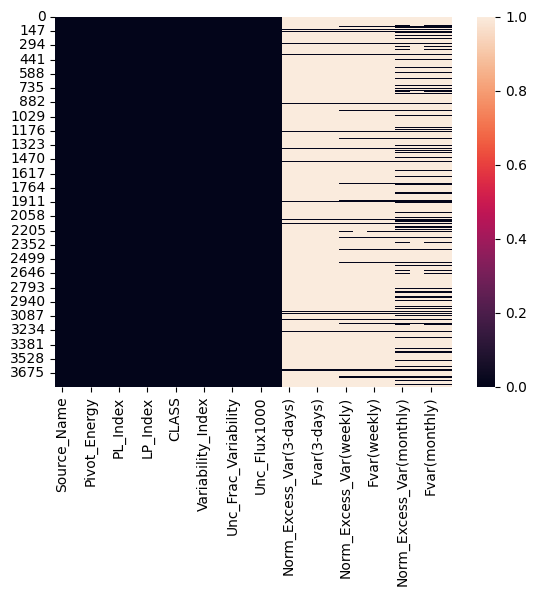

In [10]:
# Counting NaN values in all columns
print(df_clean.isna().sum())
# Heatmap with missing values distribution
sns.heatmap(df_clean.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Source_Name                   3814 non-null   object 
 1   SpectrumType                  3814 non-null   object 
 2   Pivot_Energy                  3814 non-null   float32
 3   PL_Flux_Density               3814 non-null   float32
 4   PL_Index                      3814 non-null   float32
 5   LP_Flux_Density               3814 non-null   float32
 6   LP_Index                      3814 non-null   float32
 7   LP_beta                       3814 non-null   float32
 8   CLASS                         3814 non-null   object 
 9   SED_class                     3814 non-null   object 
 10  Variability_Index             3814 non-null   float32
 11  Frac_Variability              3814 non-null   float32
 12  Unc_Frac_Variability          3814 non-null   float32
 13  Flu

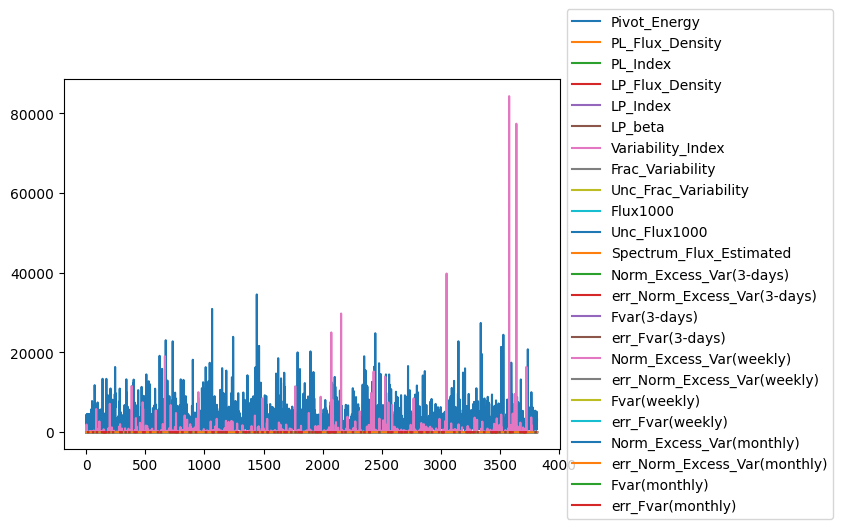

In [11]:
df_clean.info()
ax = df_clean.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # place legend outside plot

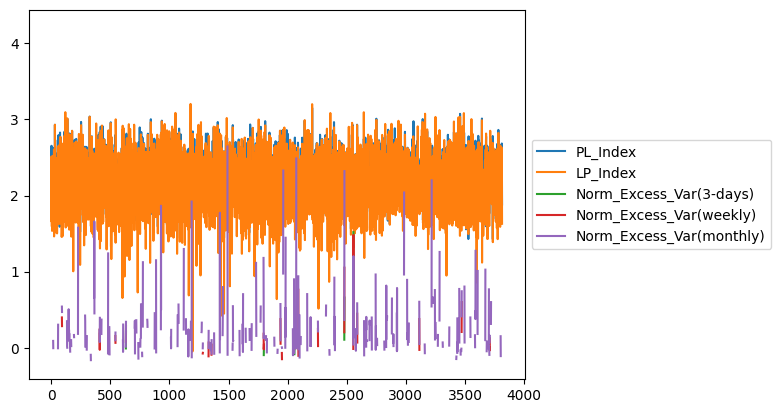

In [12]:
ax = df_subset.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # place legend outside plot

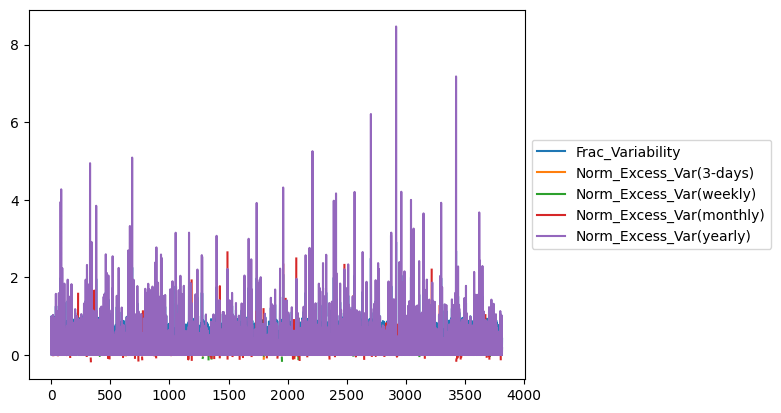

In [13]:
ax = df_subset_var.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # place legend outside plot

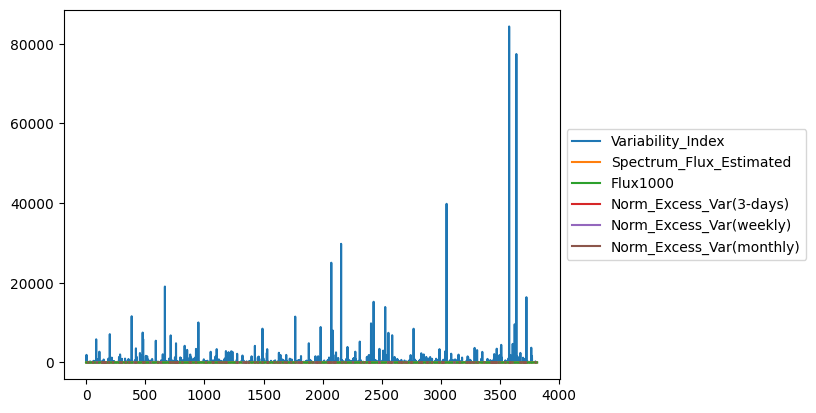

In [14]:
ax = df_subset2.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # place legend outside plot

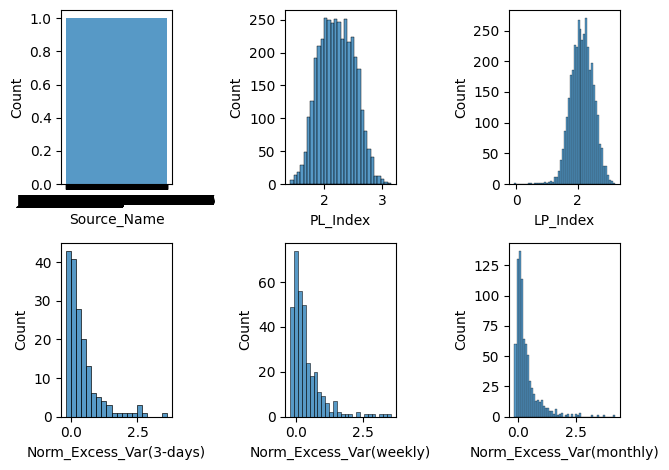

In [15]:
# Histogramas
names = df_subset.columns
fig, axes = plt.subplots(2,3)
for name, ax in zip(names, axes.flatten()):
    #sns.boxplot(y=name, data=df, notch=True, ax=ax)
    sns.histplot(data=df_subset, x=name, ax=ax)
plt.tight_layout()

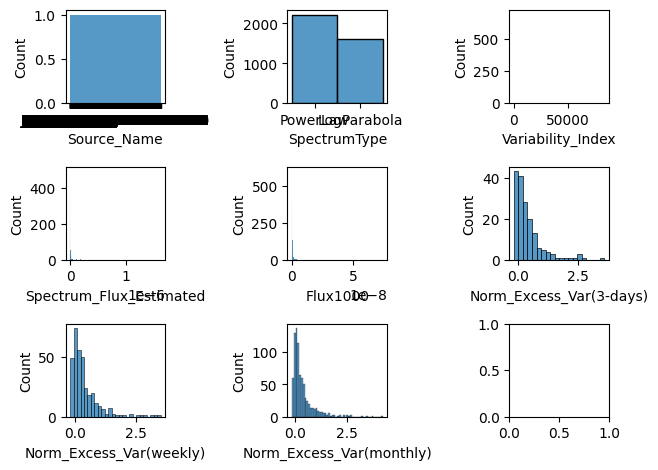

In [16]:
# Histogramas
names = df_subset2.columns
fig, axes = plt.subplots(3,3)
for name, ax in zip(names, axes.flatten()):
    #sns.boxplot(y=name, data=df, notch=True, ax=ax)
    sns.histplot(data=df_subset2, x=name, ax=ax)
plt.tight_layout()

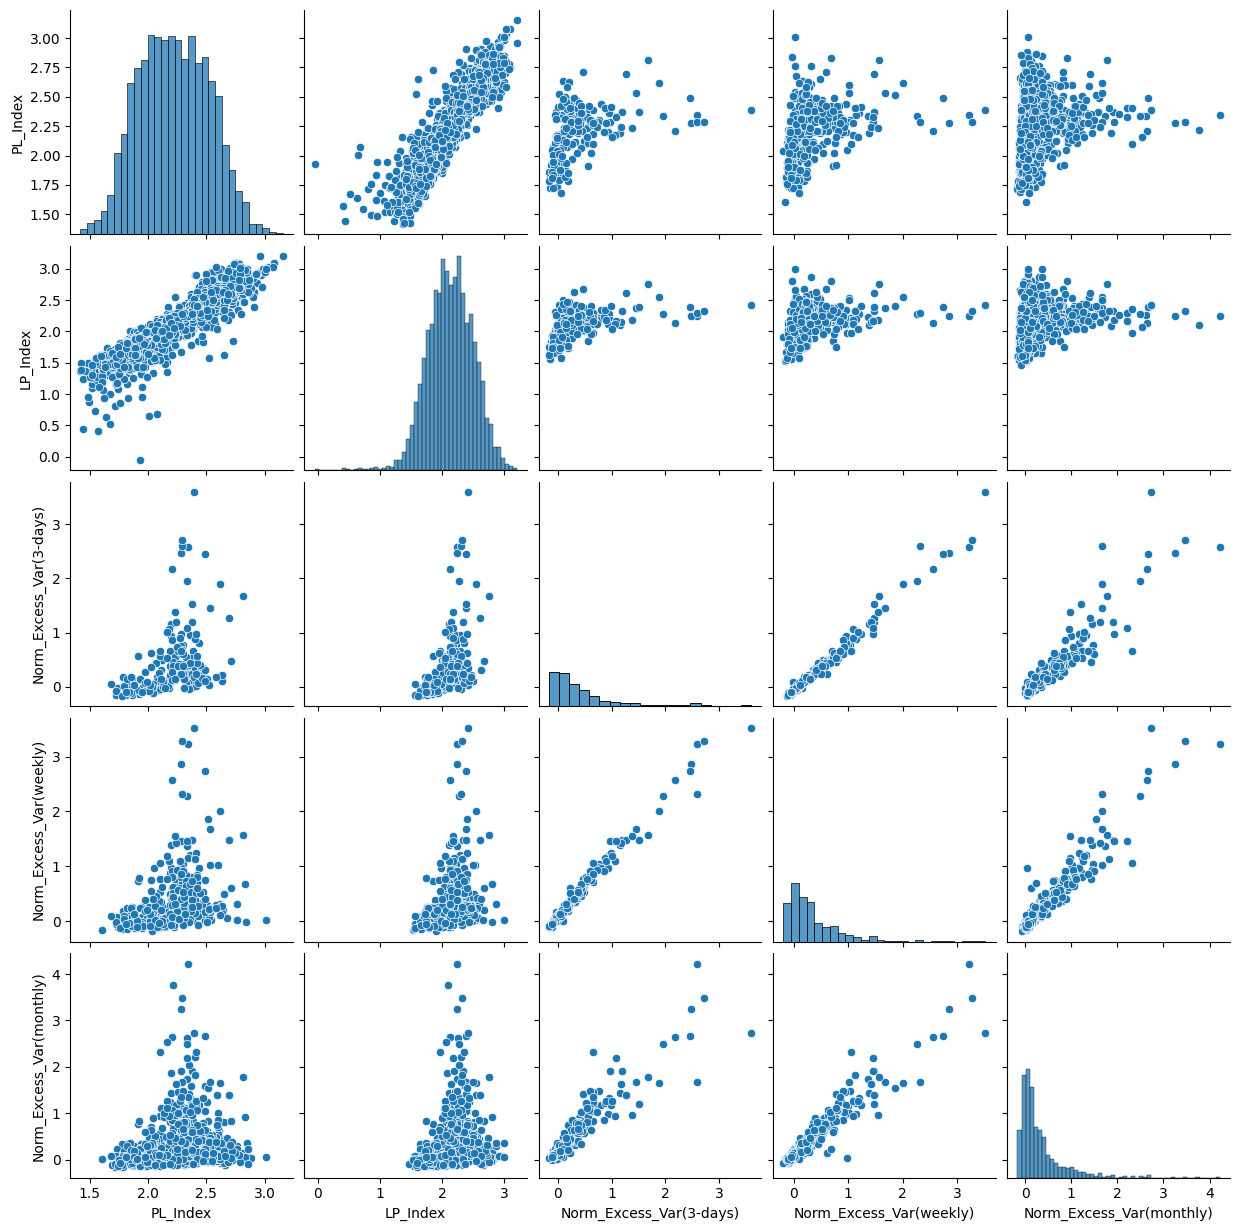

In [17]:
sns.pairplot(df_subset)

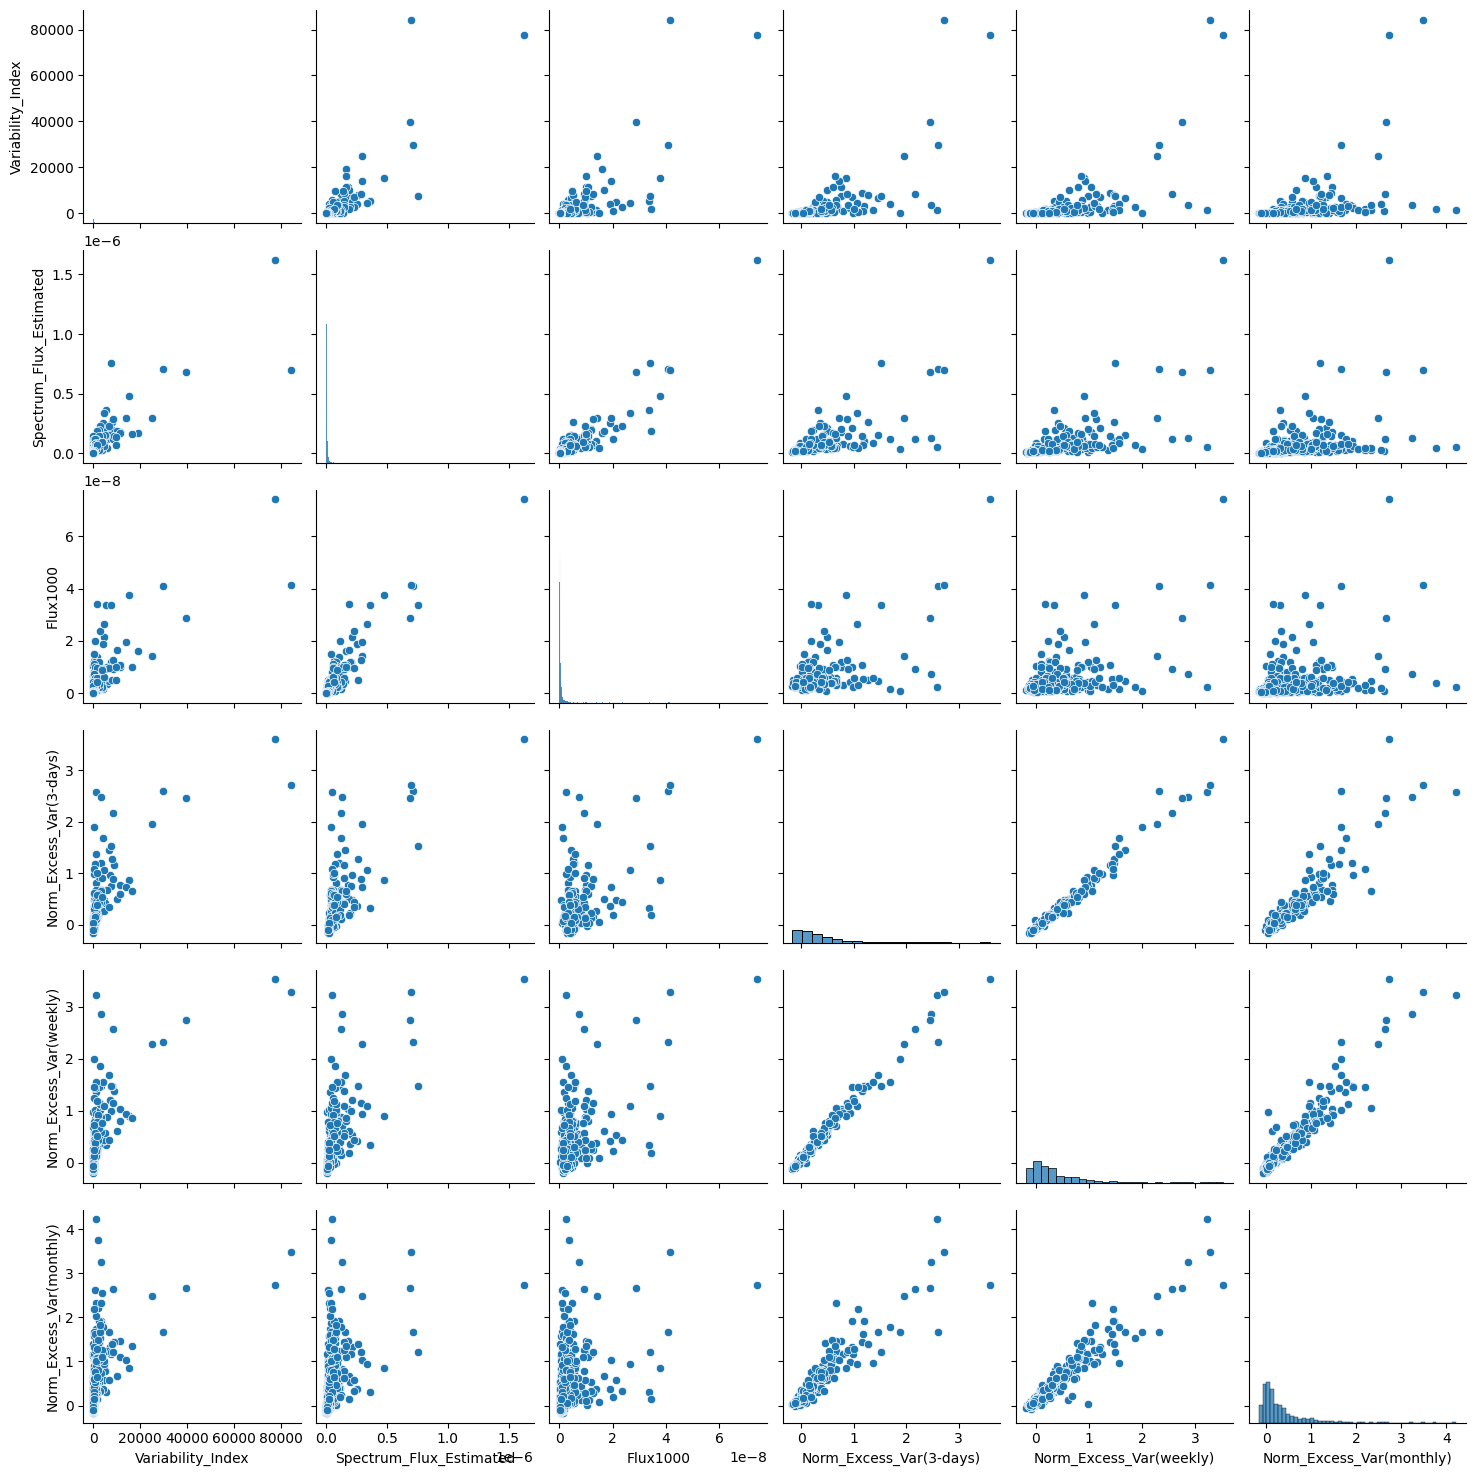

In [18]:
sns.pairplot(df_subset2)

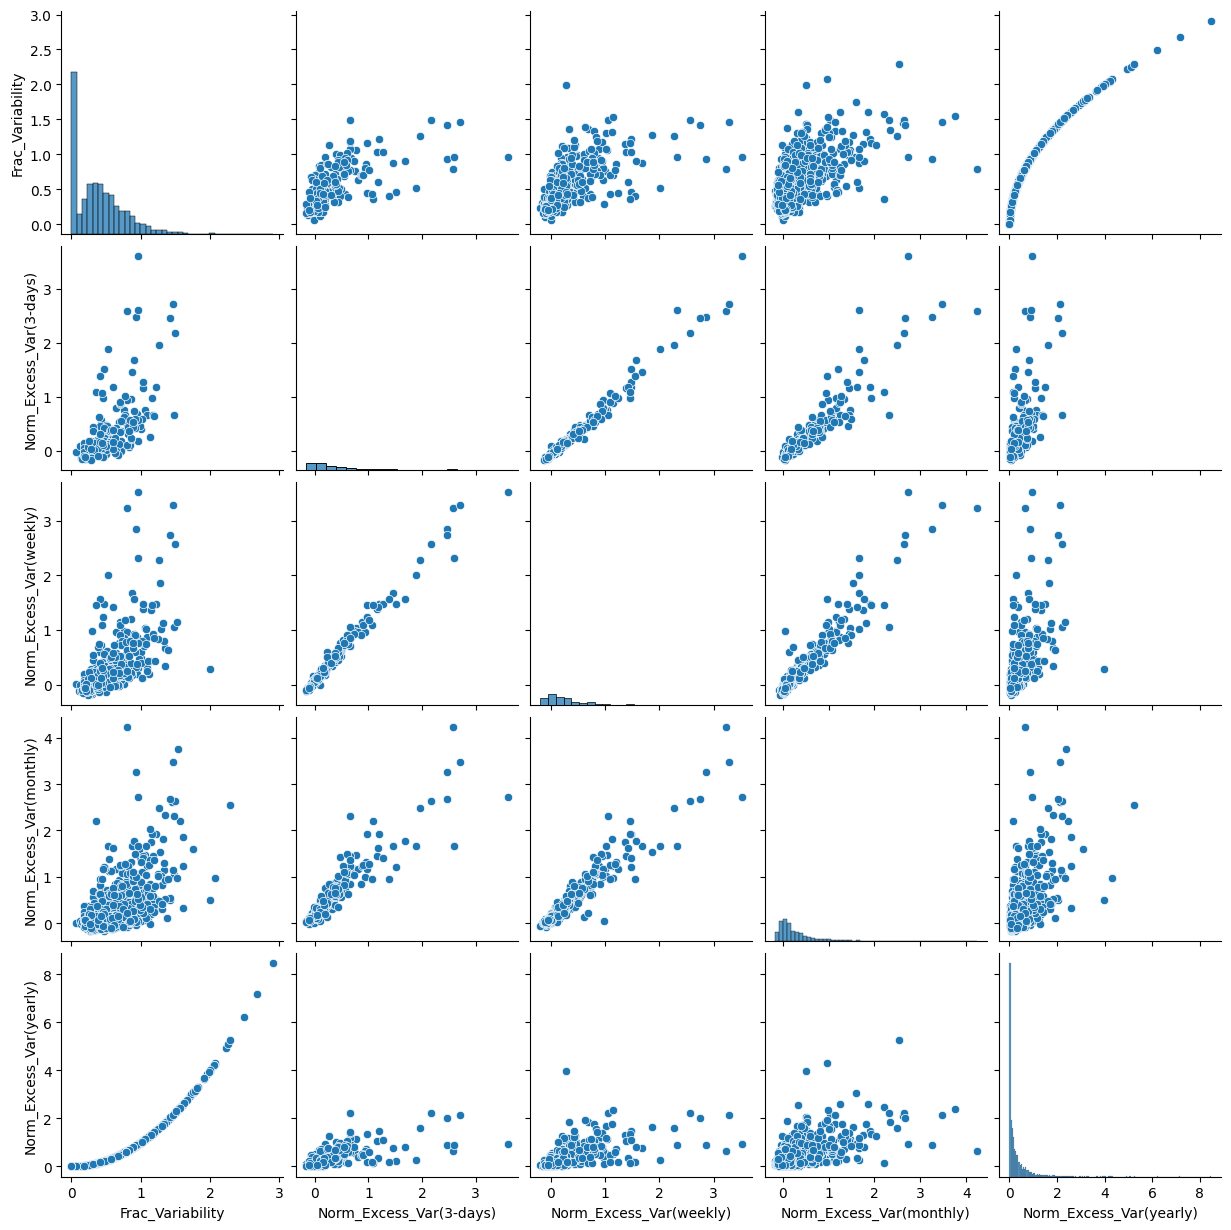

In [19]:
sns.pairplot(df_subset_var)

In [20]:
## counting non-NaN values for each column
non_nan_counts = df_subset_var.count()

print(non_nan_counts)

Source_Name                 3814
Frac_Variability            3814
Norm_Excess_Var(3-days)      173
Norm_Excess_Var(weekly)      339
Norm_Excess_Var(monthly)     803
Norm_Excess_Var(yearly)     3814
dtype: int64
